In [55]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
import pandas as pd

In [57]:
import os

In [58]:
dados = pd.read_csv("../2-AggregateData/springMaintainers_exclude_internal_pulls.csv") #../2-AggregateData/googleMaintainers_exclude_internal_pulls.csv

In [59]:
dados 
#print(dados)

,Unnamed: 0,framework,login,seguidores,numero_prs_criados,numero_merges,numero_prs_criado_mergeado,numero_prs_criado_n_mergeado,numero_prs_n_mergeado_fechado,numero_prs_fechado,numero_merges_exclude_auto_merge,numero_revisoes_exclude_auto_revisado,auto_revisado,tempo experiencia(dias)
0,0,Spring,Buzzardo,29.0,0,100,0,0,60,160,100,160,0,627
1,1,Spring,dsyer,3425.0,0,140,0,0,92,232,140,232,0,2444
2,2,Spring,martinlippert,217.0,0,5,0,0,0,5,5,5,0,0
3,3,Spring,gregturn,742.0,0,328,0,0,105,433,328,433,0,2937
4,4,Spring,bclozel,1161.0,0,36,0,0,9,45,36,45,0,942
5,5,Spring,royclarkson,484.0,0,22,0,0,0,22,22,22,0,573
6,6,Spring,cbeams,692.0,0,5,0,0,3,8,5,8,0,14
7,7,Spring,snicoll,1675.0,0,2,0,0,3,5,2,5,0,943
8,8,Spring,habuma,1154.0,0,2,0,0,0,2,2,2,0,14
9,9,Spring,jzheaux,340.0,0,3,0,0,0,3,3,3,0,585


Fazer para numero de merged pf e depois fazer para os create

In [60]:
contagem = []
for numero in dados['numero_revisoes_exclude_auto_revisado']:
  contagem.append(numero)
  

In [61]:
contagem

[160,
 232,
 5,
 433,
 45,
 22,
 8,
 5,
 2,
 3,
 7,
 2,
 3,
 2,
 0,
 9,
 0,
 0,
 2,
 10,
 16,
 6,
 0,
 16,
 0,
 3,
 2]

In [62]:
contagem.sort()

Aqui eu crio as porcentagens que vamos usar, coloquei de 5% em 5%

In [63]:
percentiles=[x * 0.05 for x in range(1, 21)]

In [64]:
percentiles

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0]

In [65]:
result = pd.DataFrame(contagem).describe(percentiles=percentiles).values[4:24]

In [66]:
pd.DataFrame(contagem).describe(percentiles=percentiles)

,0
count,27.000000
mean,36.777778
std,94.836026
min,0.000000
5%,0.000000
10%,0.000000
15%,0.000000
20%,2.000000
25%,2.000000
30%,2.000000


In [67]:
len(contagem)

27

In [68]:
result

array([[  0. ],
       [  0. ],
       [  0. ],
       [  2. ],
       [  2. ],
       [  2. ],
       [  2.1],
       [  3. ],
       [  3. ],
       [  5. ],
       [  5.3],
       [  6.6],
       [  7.9],
       [  9.2],
       [ 13. ],
       [ 16. ],
       [ 24.3],
       [ 91. ],
       [210.4],
       [433. ]])

In [69]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [70]:
def lorenz_curve(X, framework):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    fig, ax = plt.subplots(figsize=[3,3])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', color='darkgreen', s=100,label="Lorenz " + framework)
    ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,color='darkgreen')
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k',label="Perfect Equality")
    #plt.plot(y,label="lorenz")
#plt.plot(y_pe,label="perfect_equality")
    ax.legend()
    figure_title = "Lorenz Curve Pulls \nRequests "+ framework
    plt.text(0.5, 1.08, figure_title,
    horizontalalignment='center',
    fontsize=13,
    fontweight="bold",
    transform = ax.transAxes)
    ax.set_ylabel('Proportion of reviews',fontsize=13)
    ax.set_xlabel('Proportion of Maintainers',fontsize=13) 
    ax.figure.savefig('../4-LorenzGini/' + framework + '_LORENZ_GINI_SAMPLE_Actual.png', format='png',dpi = 250, bbox_inches='tight')

Colocar legenda na figura

In [71]:
gini(result)

array([0.82537688])

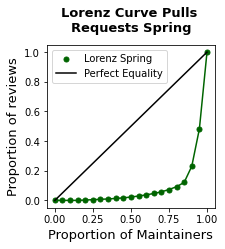

In [72]:
lorenz_curve(result,"Spring")

In [ ]:
len(contagem[28:])
(24*100)/52

46.15384615384615